scaling_factor: [[0.11435943+0.09394925j]] (1, 1)
scaling_factor: [[5.55111512e-17-0.03380453j]] (1, 1)
scaling_factor: [[-0.01329178-0.01329178j]] (1, 1)
scaling_factor: [[0.1432518+0.1743728j]] (1, 1)


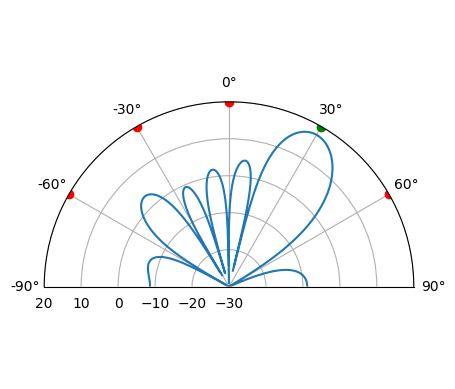

In [1]:
import numpy as np
import matplotlib.pyplot as plt

d = 0.5 # half wavelength spacing
Nr = 8 # number of elements in the array

theta_soi = np.deg2rad(30) # direction we want to point towards (signal of interest)
nulls = np.deg2rad([-60, -30, 0, 60])

# Start out with conventional beamformer pointed at theta_soi
w = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(theta_soi)).reshape(-1,1)

# Loop through nulls
for null in nulls:
    # weights equal to steering vector in target null direction
    w_null = np.exp(-2j * np.pi * d * np.arange(Nr) * np.sin(null)).reshape(-1,1)

    # scaling_factor (complex scalar) for w at nulled direction
    scaling_factor = w_null.conj().T @ w / (w_null.conj().T @ w_null)
    print("scaling_factor:", scaling_factor, scaling_factor.shape)

    # Update weights to include the null
    w = w - w_null @ scaling_factor # sidelobe-canceler equation

w = w.squeeze() # remove the extra dimension (3x1 to 3)

# Visualize the beam pattern (don't worry as much about this part)
N_fft = 1024
w = np.conj(w) # or else our answer will be negative/inverted
w_padded = np.concatenate((w, np.zeros(N_fft - Nr))) # zero pad to N_fft elements to get more resolution in the FFT
w_fft_dB = 10*np.log10(np.abs(np.fft.fftshift(np.fft.fft(w_padded)))**2) # magnitude of fft in dB
theta_bins = np.arcsin(np.linspace(-1, 1, N_fft)) # Map the FFT bins to angles in radians
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta_bins, w_fft_dB) # MAKE SURE TO USE RADIAN FOR POLAR
# Add dots where nulls and SOI are
for null in nulls:
    ax.plot([null], [20], 'or')
ax.plot([theta_soi], [20], 'og')
ax.set_theta_zero_location('N') # type: ignore # make 0 degrees point up
ax.set_theta_direction(-1) # type: ignore # increase clockwise
ax.set_thetamin(-90) # type: ignore # only show top half
ax.set_thetamax(90) # type: ignore
ax.set_ylim((-30, 20)) # because there's no noise, only go down 30 dB
plt.show()
